In [1]:
from trader.AlphaVantage import AlphaVantage

from trader.ATrader import ATrader

from trader.Iterator import Iterator

import pandas as pd

import os.path

fname = 'TLSA.csv'

if not os.path.isfile(fname):
    interval = 'Daily'
    client = AlphaVantage()
    df = client.get_dataframe('TIME_SERIES_DAILY', 'TLSA', interval)
    df.to_csv('TLSA.csv')
else:
    print('use existed file')

df = pd.read_csv('TLSA.csv')

use existed file


In [2]:
portfolio = 2000
lot = 40

In [8]:
it = Iterator(df)
deltas = it.get_delta_range()
analytic_df = pd.DataFrame(index = deltas, columns = ['start', 'result', '%'])
analytic_df['start'] = portfolio

def trade(row):
    trader = ATrader(df.copy())
    trader.analyze(10, 50, float(row.name))
    return trader.trade(portfolio, lot)

    # print(result_portfolio)
analytic_df['result'] = analytic_df.apply(trade, axis=1)
analytic_df['%'] = round((analytic_df['result'] - analytic_df['start'])/analytic_df['start'],2)*100
analytic_df
# analytic_df.plot(y = ['%'])

,start,result,%
0.203000,2000,2004.3504,0.0
0.302429,2000,2059.0700,3.0
0.401857,2000,2159.2784,8.0
0.501286,2000,2159.6064,8.0
0.600714,2000,2086.3332,4.0
0.700143,2000,2165.1120,8.0
0.799571,2000,2177.9088,9.0
0.899000,2000,2212.6932,11.0
0.998429,2000,2197.5340,10.0
1.097857,2000,2071.3852,4.0


2287.3508

<Figure size 800x800 with 0 Axes>

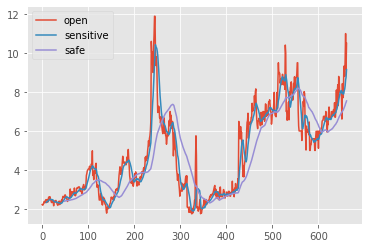

In [10]:
trader = ATrader(df.copy())
trader.analyze(10, 50, 1.4)
trader.trade(portfolio, lot)
trader.df
trader.plot(['open','sensitive','safe'])

In [5]:
def dump(obj):
  for attr in dir(obj):
    print("obj.%s = %r" % (attr, getattr(obj, attr)))

'SELLS:5, BUYS: 5'

<AxesSubplot:>

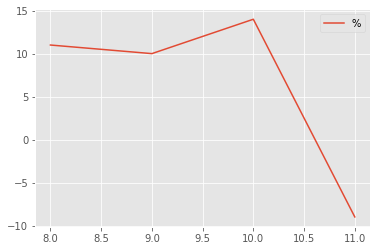

In [16]:
analytic_df = pd.DataFrame(index = range(8,12, 1), columns = ['start', 'result', '%'])
analytic_df
analytic_df['start'] = portfolio

def trade_sensitive(row):
    trader = ATrader(df.copy())
    trader.analyze(int(row.name), 50, 1.4)
    return trader.trade(portfolio, lot)

analytic_df['result'] = analytic_df.apply(trade_sensitive, axis=1)
analytic_df['%'] = round((analytic_df['result'] - analytic_df['start'])/analytic_df['start'],2)*100
analytic_df.plot(y = ['%'])

<AxesSubplot:>

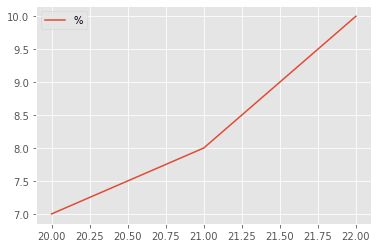

In [20]:
analytic_df = pd.DataFrame(index = range(20,23, 1), columns = ['start', 'result', '%'])
analytic_df
analytic_df['start'] = portfolio

def trade_safe(row):
    trader = ATrader(df.copy())
    trader.analyze(int(row.name), 50, 1.4)
    return trader.trade(portfolio, lot)

analytic_df['result'] = analytic_df.apply(trade_safe, axis=1)
analytic_df['%'] = round((analytic_df['result'] - analytic_df['start'])/analytic_df['start'],2)*100
analytic_df.plot(y = ['%'])

1734.5348

<Figure size 800x800 with 0 Axes>

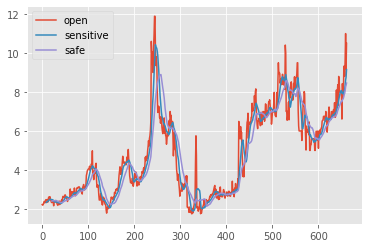

In [22]:
trader = ATrader(df.copy())
trader.analyze(10, 22, 1.4)
result = trader.trade(portfolio, lot)
trader.df
trader.plot(['open','sensitive','safe'])
result